In [7]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import pandas as pd
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (40.0, 4.0) # set default size of plots
HOME = "/Users/cusgadmin/Desktop/plots-model-comp-paper/results/single_model_profs"

In [8]:
def getData(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    data = d['client_metrics'][0]['all_lats']
    data = [str(x)[1:-1] for x in data] # remove brackets
    data = [x.split(', ') for x in data] # to list
    data = np.asarray(data).astype(float)
    return data

In [11]:
def getInfo(FN):
    with open(FN) as json_data:
        d = json.load(json_data)
    return d['node_configs'][0]

In [12]:
for subdir, dirs, files in os.walk(HOME+"/tf-inception"):
    for file in files:
        if os.path.splitext(file)[1] != ".json":
            continue
        PATH = subdir+"/"+file
        print getInfo(PATH)

{u'model_image': u'model-comp/inception-feats', u'name': u'inception', u'cpus_per_replica': 2, u'input_type': u'floats', u'use_nvidia_docker': True, u'batch_size': 2, u'num_replicas': 1, u'instance_type': u'p2.8xlarge', u'no_diverge': True, u'slo': 5000000, u'gpus_per_replica': 1, u'allocated_cpus': [10, 26], u'gpus': [0], u'input_size': -1}
{u'model_image': u'model-comp/inception-feats', u'name': u'inception', u'cpus_per_replica': 2, u'input_type': u'floats', u'use_nvidia_docker': True, u'batch_size': 4, u'num_replicas': 1, u'instance_type': u'p2.8xlarge', u'no_diverge': True, u'slo': 5000000, u'gpus_per_replica': 1, u'allocated_cpus': [10, 26], u'gpus': [0], u'input_size': -1}
{u'model_image': u'model-comp/inception-feats', u'name': u'inception', u'cpus_per_replica': 2, u'input_type': u'floats', u'use_nvidia_docker': True, u'batch_size': 6, u'num_replicas': 1, u'instance_type': u'p2.8xlarge', u'no_diverge': True, u'slo': 5000000, u'gpus_per_replica': 1, u'allocated_cpus': [10, 26], u

{u'model_image': u'gcr.io/clipper-model-comp/inception-feats:bench', u'name': u'inception', u'cpus_per_replica': 4, u'input_type': u'floats', u'batch_size': 24, u'num_replicas': 1, u'gpu_type': u'p100', u'no_diverge': True, u'slo': 5000000, u'input_size': -1, u'cloud': u'gcp'}
{u'model_image': u'gcr.io/clipper-model-comp/inception-feats:bench', u'name': u'inception', u'cpus_per_replica': 4, u'input_type': u'floats', u'batch_size': 32, u'num_replicas': 1, u'gpu_type': u'p100', u'no_diverge': True, u'slo': 5000000, u'input_size': -1, u'cloud': u'gcp'}
{u'model_image': u'gcr.io/clipper-model-comp/inception-feats:bench', u'name': u'inception', u'cpus_per_replica': 4, u'input_type': u'floats', u'batch_size': 4, u'num_replicas': 1, u'gpu_type': u'p100', u'no_diverge': True, u'slo': 5000000, u'input_size': -1, u'cloud': u'gcp'}
{u'model_image': u'gcr.io/clipper-model-comp/inception-feats:bench', u'name': u'inception', u'cpus_per_replica': 4, u'input_type': u'floats', u'batch_size': 48, u'num_

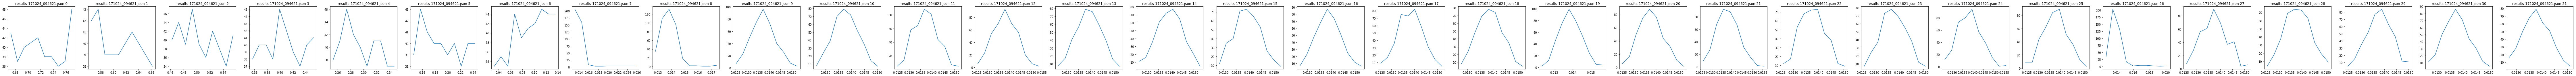

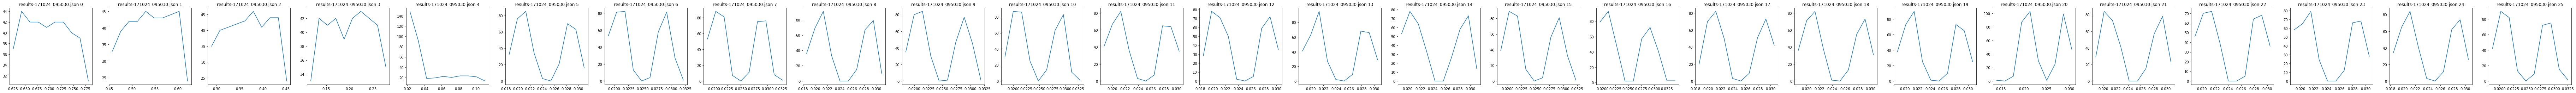

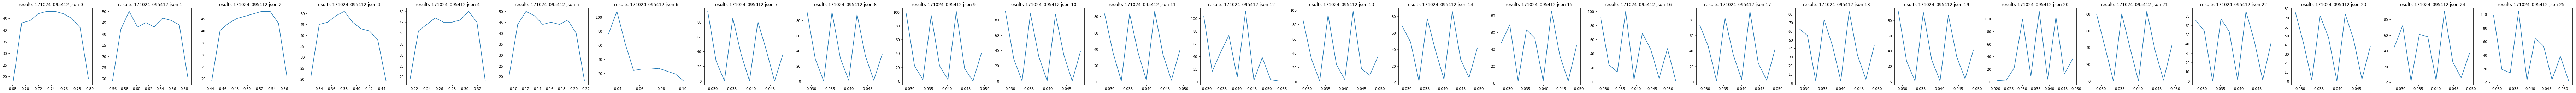

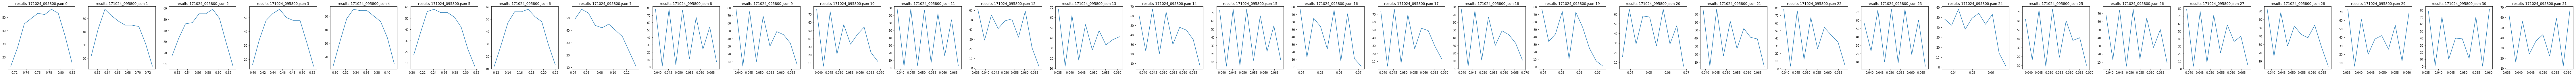

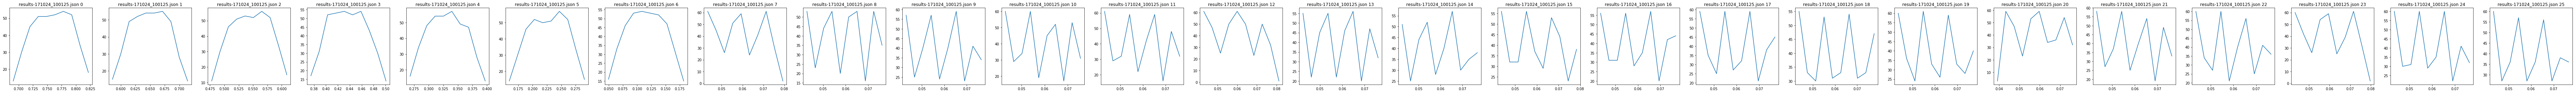

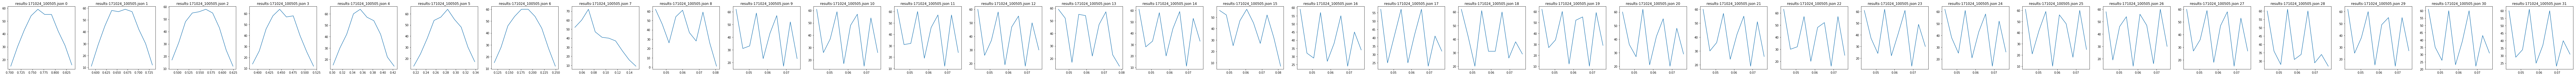

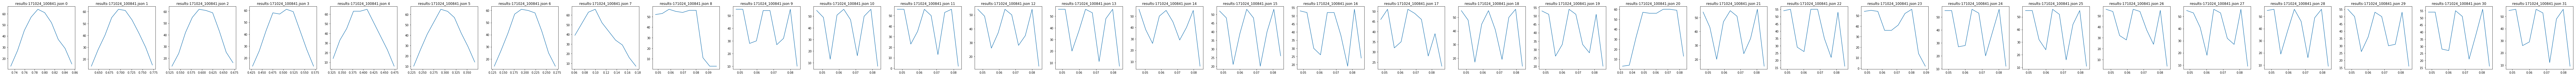

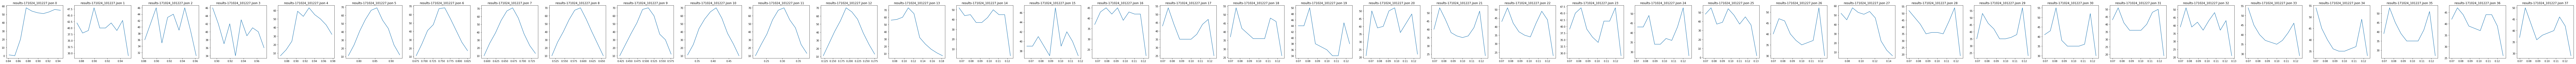

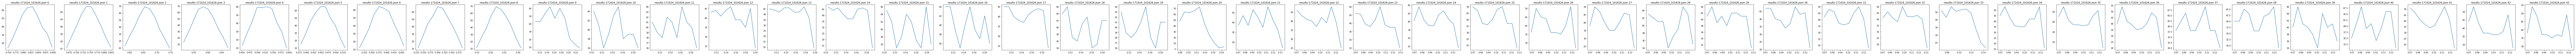

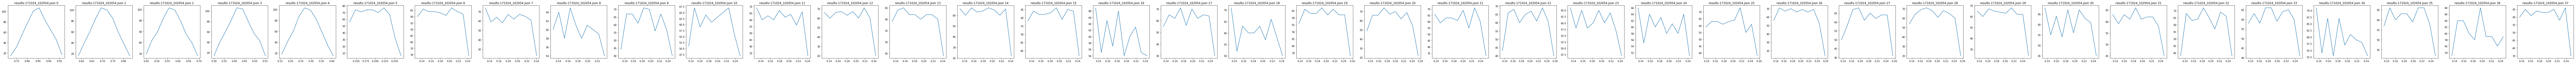

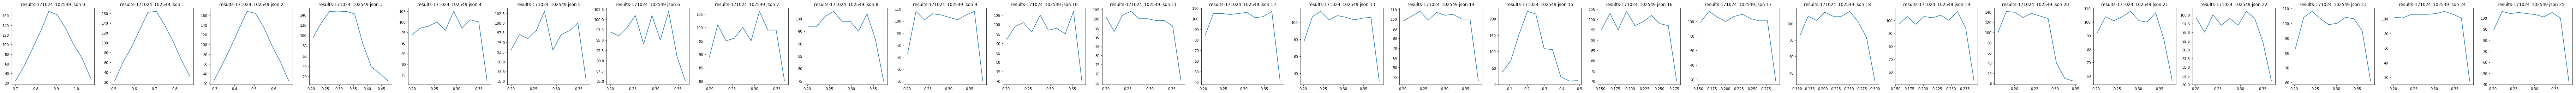

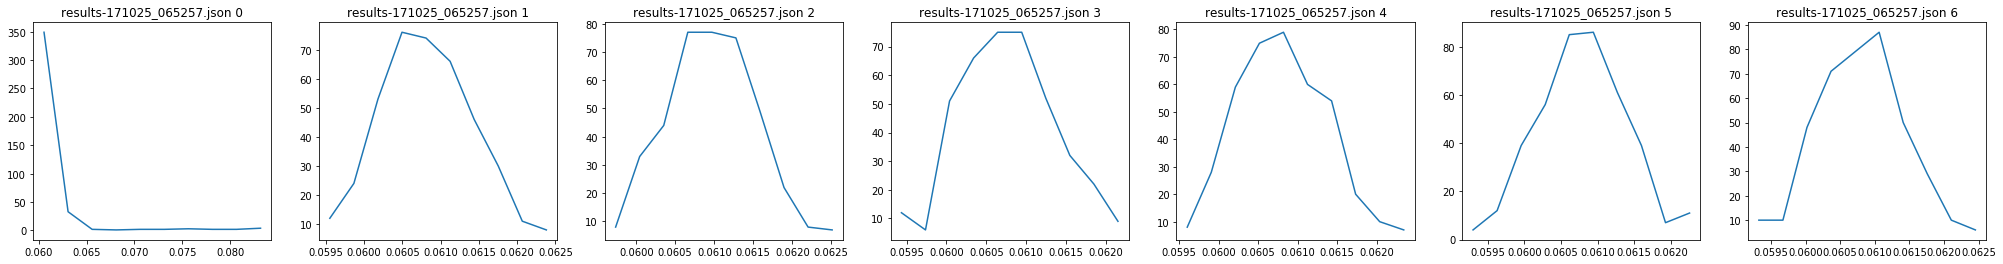

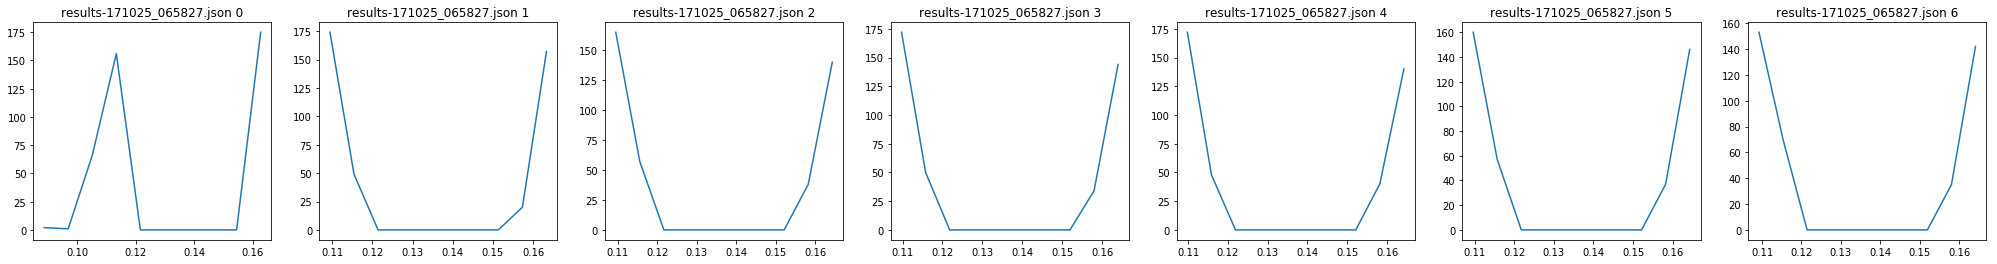

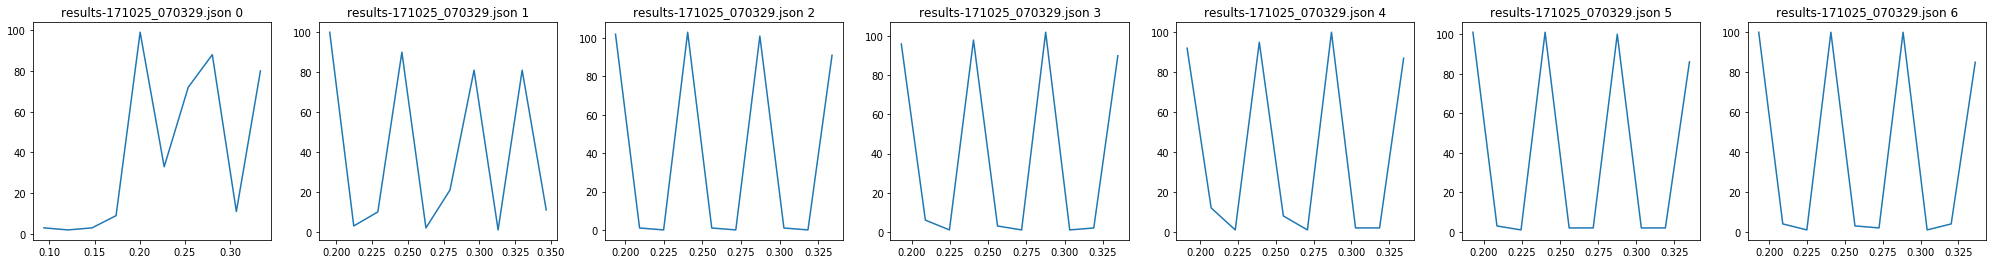

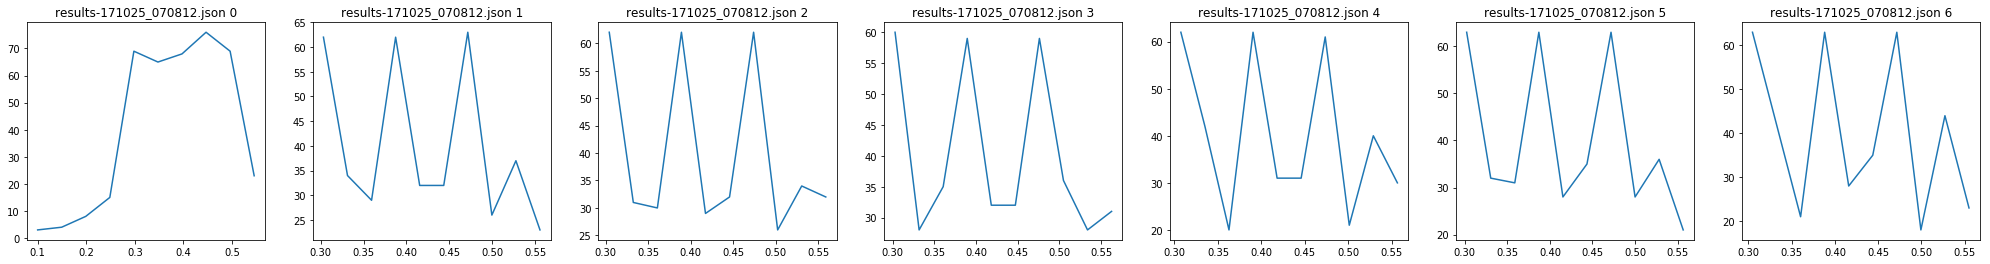

In [15]:
for subdir, dirs, files in os.walk(HOME+"/pytorch-alexnet"):
    for file in files:
        if os.path.splitext(file)[1] != ".json":
            continue
        PATH = subdir+"/"+file
        data = getData(PATH)
        plt.figure(figsize = (data.shape[0]*5, 4))
        for i in xrange(data.shape[0]):
            y,binEdges = np.histogram(data[i])
            bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
            plt.subplot(1,data.shape[0],i+1)
            FN = str(file)
            plt.gca().set_title((FN)+" "+str(i))
            plt.plot(bincenters,y,'-');
    break


In [146]:
df = pd.DataFrame(data.T)
describe = df.describe()
describe

0           1           2           3           4           5   \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.721184    0.612856    0.507584    0.404946    0.299084    0.194253   
std      0.031506    0.031163    0.029670    0.030320    0.029806    0.031046   
min      0.667564    0.559796    0.457241    0.351935    0.247709    0.141016   
25%      0.694430    0.585313    0.482001    0.379240    0.273378    0.167622   
50%      0.720041    0.613098    0.506520    0.404415    0.298829    0.193553   
75%      0.748466    0.639937    0.532762    0.430913    0.324627    0.221522   
max      0.774497    0.667358    0.560075    0.457649    0.352355    0.248030   

               6           7           8           9      ...              22  \
count  400.000000  400.000000  400.000000  400.000000     ...      400.000000   
mean     0.087163    0.014330    0.013823    0.013738     ...        0.013766   
std      0.032480    0.002191    0.000651    0.000539     ...        0.000534   
min      0.026929    0.012442    0.012554    0.012374     ...        0.012485   
25%      0.060957    0.013420    0.013433    0.013352     ...        0.013392   
50%      0.088381    0.013822    0.013767    0.013734     ...        0.013763   
75%      0.115413    0.014279    0.014161    0.014091     ...        0.014122   
max      0.141406    0.026507    0.017647    0.015401     ...        0.015180   

               23          24          25          26          27          28  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.013785    0.013824    0.013762    0.013938    0.013745    0.013837   
std      0.000533    0.000551    0.000544    0.000958    0.000532    0.000538   
min      0.012466    0.012493    0.012286    0.012260    0.012465    0.012427   
25%      0.013412    0.013418    0.013373    0.013441    0.013345    0.013427   
50%      0.013768    0.013815    0.013771    0.013788    0.013736    0.013822   
75%      0.014165    0.014178    0.014122    0.014184    0.014104    0.014198   
max      0.015209    0.015753    0.015308    0.020574    0.015270    0.015242   

               29          30          31  
count  400.000000  400.000000  400.000000  
mean     0.013802    0.013750    0.013781  
std      0.000531    0.000502    0.000526  
min      0.012354    0.012538    0.012586  
25%      0.013447    0.013382    0.013398  
50%      0.013806    0.013746    0.013770  
75%      0.014185    0.014072    0.014155  
max      0.015159    0.015160    0.015238  

[8 rows x 32 columns]